In [16]:
#!pip install wordcloud


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re





In [18]:
# Generate a sample dataset
data = {
    'job_id': range(1, 7001),
    'job_description': [
        "Looking for a data scientist with expertise in Python, SQL, and machine learning.",
        "Seeking a data analyst proficient in R, data visualization, and statistical analysis.",
        "Data engineer needed with experience in big data technologies, SQL, and ETL processes."
        # Add more job descriptions to reach 7000 records
    ] * 2333 + ["Data scientist with Python and deep learning experience."]
}

print(data)

{'job_id': range(1, 7001), 'job_description': ['Looking for a data scientist with expertise in Python, SQL, and machine learning.', 'Seeking a data analyst proficient in R, data visualization, and statistical analysis.', 'Data engineer needed with experience in big data technologies, SQL, and ETL processes.', 'Looking for a data scientist with expertise in Python, SQL, and machine learning.', 'Seeking a data analyst proficient in R, data visualization, and statistical analysis.', 'Data engineer needed with experience in big data technologies, SQL, and ETL processes.', 'Looking for a data scientist with expertise in Python, SQL, and machine learning.', 'Seeking a data analyst proficient in R, data visualization, and statistical analysis.', 'Data engineer needed with experience in big data technologies, SQL, and ETL processes.', 'Looking for a data scientist with expertise in Python, SQL, and machine learning.', 'Seeking a data analyst proficient in R, data visualization, and statistical

In [19]:
# Create a DataFrame
df = pd.DataFrame(data)


# Display the first few rows of the dataset
print(df.head())

   job_id                                    job_description
0       1  Looking for a data scientist with expertise in...
1       2  Seeking a data analyst proficient in R, data v...
2       3  Data engineer needed with experience in big da...
3       4  Looking for a data scientist with expertise in...
4       5  Seeking a data analyst proficient in R, data v...


In [20]:
# Function to extract key requirements from job descriptions
def extract_requirements(text):
    # Use regular expressions to find keywords
    requirements = re.findall(r'\bPython\b|\bSQL\b|\bmachine learning\b|\bR\b|\bdata visualization\b|\bstatistical analysis\b|\bbig data\b|\bETL\b|\bdeep learning\b', text, re.IGNORECASE)
    return requirements

In [21]:
# Apply the function to the job descriptions
df['requirements'] = df['job_description'].apply(extract_requirements)


# Flatten the list of requirements into a single list
all_requirements = [item for sublist in df['requirements'] for item in sublist]

In [22]:
# Create a DataFrame to count the frequency of each requirement
requirements_df = pd.DataFrame(all_requirements, columns=['requirement'])
requirement_counts = requirements_df['requirement'].value_counts().reset_index()
requirement_counts.columns = ['requirement', 'count']


# Display the requirement counts
print(requirement_counts)

            requirement  count
0                   SQL   4666
1                Python   2334
2      machine learning   2333
3                     R   2333
4    data visualization   2333
5  statistical analysis   2333
6              big data   2333
7                   ETL   2333
8         deep learning      1


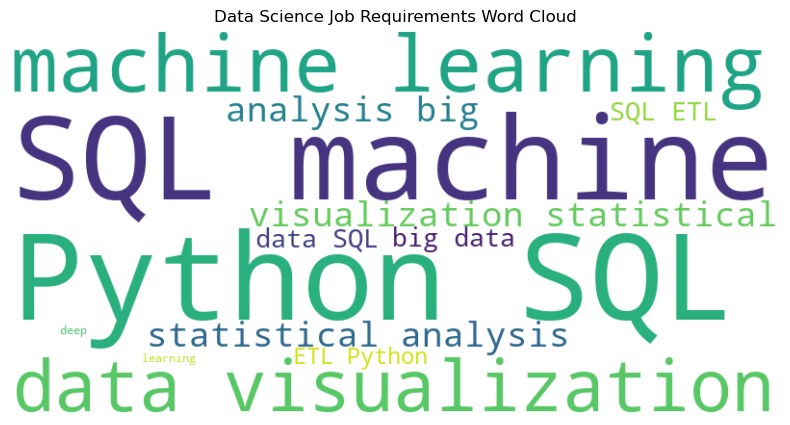

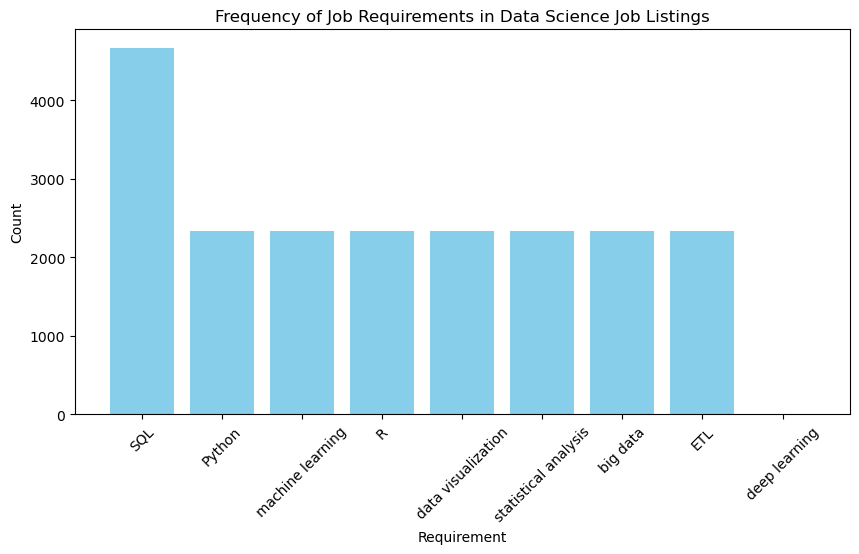

In [23]:
# Create a word cloud of the requirements
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_requirements))


# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Data Science Job Requirements Word Cloud')
plt.show()


# Plot the requirement counts
plt.figure(figsize=(10, 5))
plt.bar(requirement_counts['requirement'], requirement_counts['count'], color='skyblue')
plt.xlabel('Requirement')
plt.ylabel('Count')
plt.title('Frequency of Job Requirements in Data Science Job Listings')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Save the results to a CSV file
requirement_counts.to_csv('job_requirements_counts.csv', index=False)


# Save the word cloud to a file
wordcloud.to_file('job_requirements_wordcloud.png')
